Вариант 14

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import t as student_distr
from scipy.stats import mannwhitneyu

In [2]:
data = pd.read_csv('variant_14.csv')
data

,couple_1_1,couple_1_2,couple_2_1,couple_2_2,couple_3_1,couple_3_2,couple_4_1,couple_4_2,couple_5_1,couple_5_2,couple_6_1,couple_6_2
0,668.281741,572.446078,939.778778,-37.071572,1037.922889,-61.274956,-307.584700,-726.179936,212.151123,41.182218,314.695731,1262.377342
1,1106.938030,1018.329045,472.114352,603.258893,-21.381383,-267.594010,-1041.561791,-947.212933,953.705199,-26.074671,1003.578454,2442.443056
2,979.549559,652.712954,638.044734,814.480747,72.003290,164.699334,3.898475,-156.825198,-237.290271,-653.202884,907.164593,1527.974483
3,886.683212,525.123428,686.306498,88.869621,-456.752664,22.084062,-191.343205,-929.684848,-327.142110,286.094303,194.998128,1380.998979
4,896.912235,1225.514966,376.564770,306.014340,-1589.624726,257.806097,-1473.068546,-600.414191,1098.599374,776.653691,1476.129767,1603.417701
5,788.234148,1325.566431,522.828934,308.001497,-1355.229134,62.938029,-123.891356,-525.234222,766.466497,-389.431270,1133.222587,1243.344443
6,711.127509,958.948448,659.080532,446.529650,1206.054005,-219.887589,-1038.266957,-811.609451,260.900781,14.946475,1895.608491,2612.568430
7,1231.835113,1043.463458,532.453306,-120.249737,-812.878967,-170.837363,-1238.821763,-1278.375344,379.407842,334.473070,1333.463064,1510.337156
8,694.505832,774.848821,693.381177,535.764730,845.073206,-9.906326,-22.605257,-987.088987,-84.971892,549.214743,-517.246282,838.477834
9,404.038383,784.848388,322.989014,438.680206,-89.145620,-209.251223,196.261095,-1015.556798,12.332966,753.483263,77.404231,2439.035420


In [3]:
def visualise_quant_variable(data_series, size):
    plt.figure()
    data_series.plot.hist(figsize=(size, size), bins=60)
    plt.figure()
    data_series.plot.kde()
    plt.figure()
    data_series.plot.box()

In [4]:
alpha = 0.05

<ipython-input-3-ff0e77014622>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


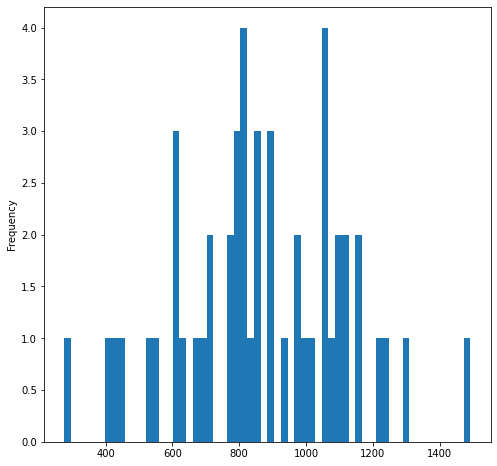

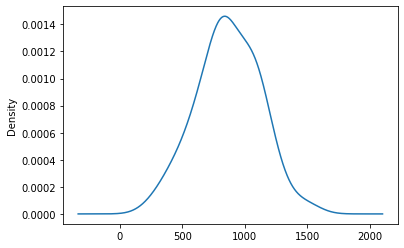

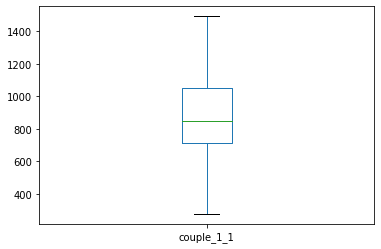

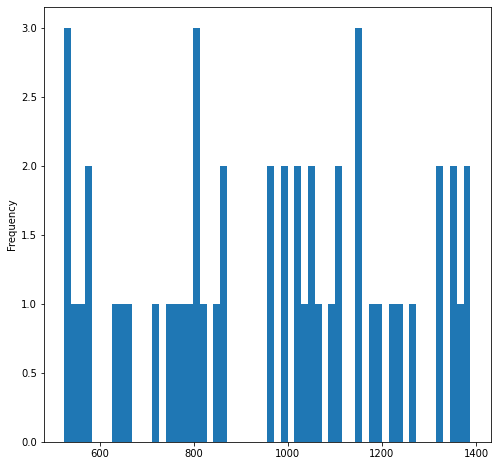

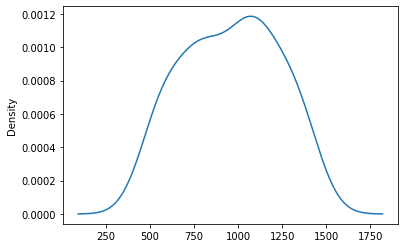

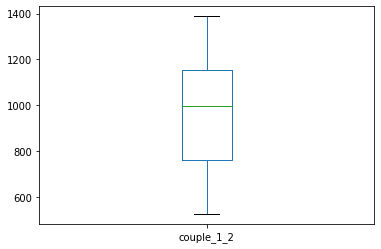

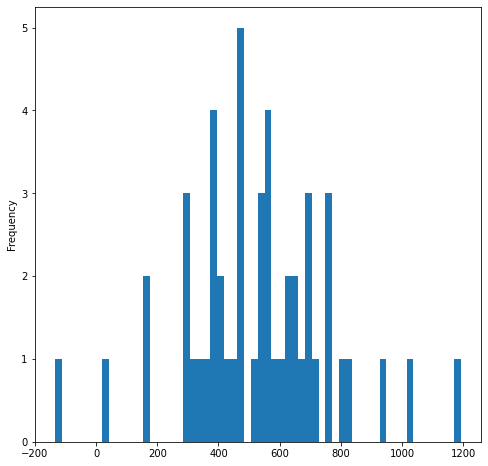

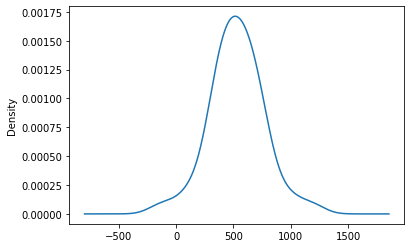

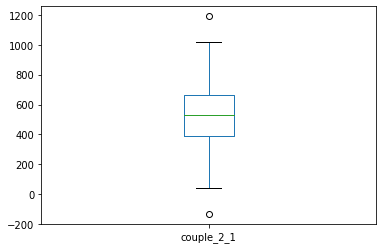

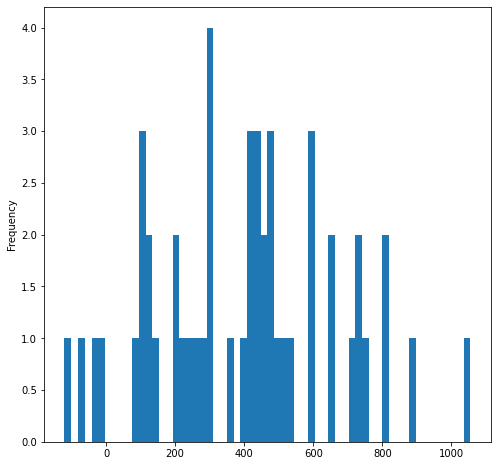

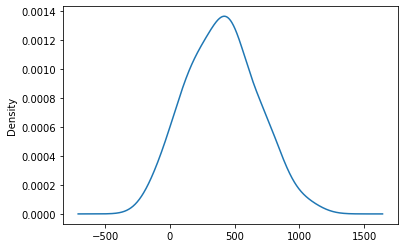

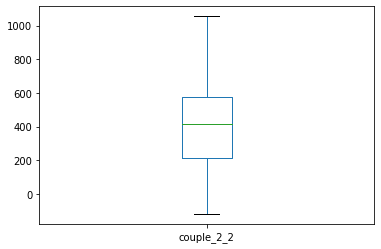

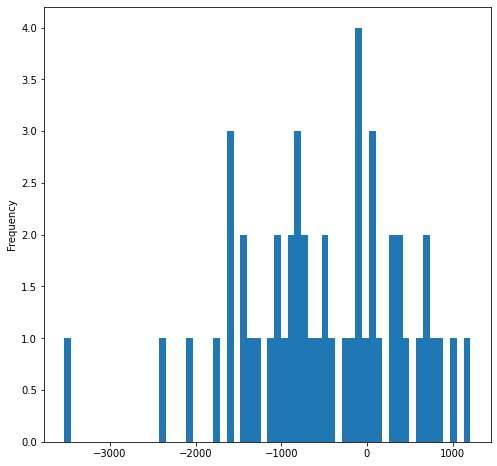

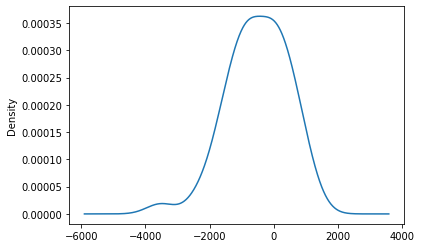

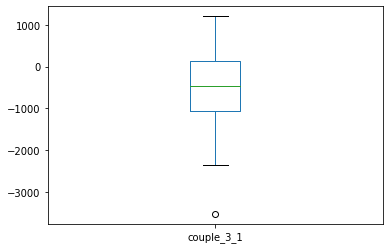

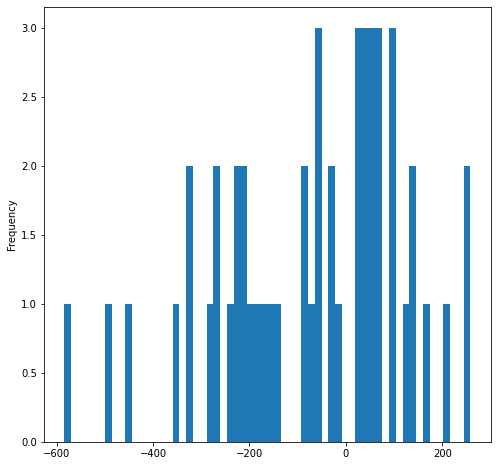

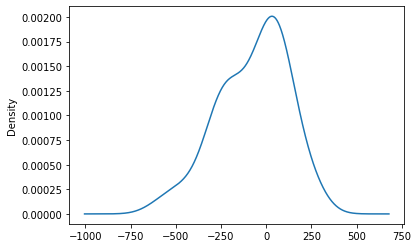

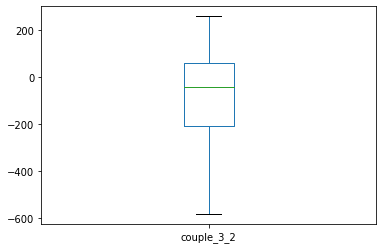

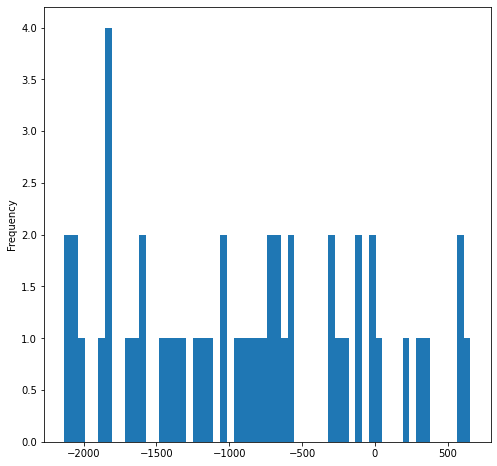

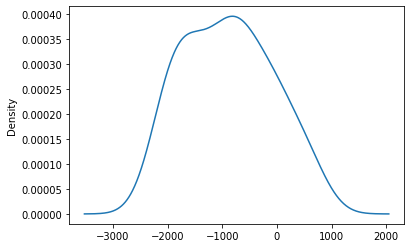

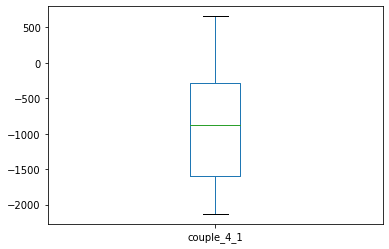

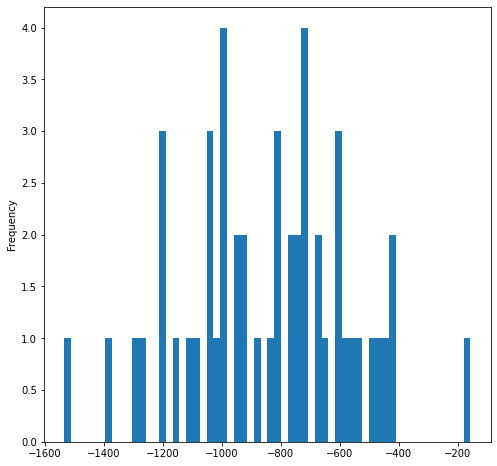

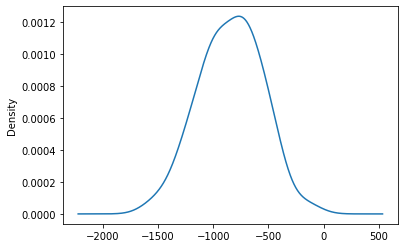

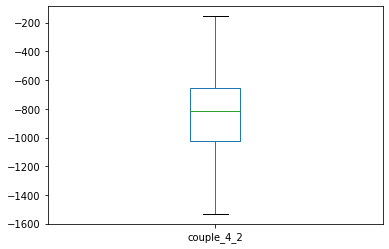

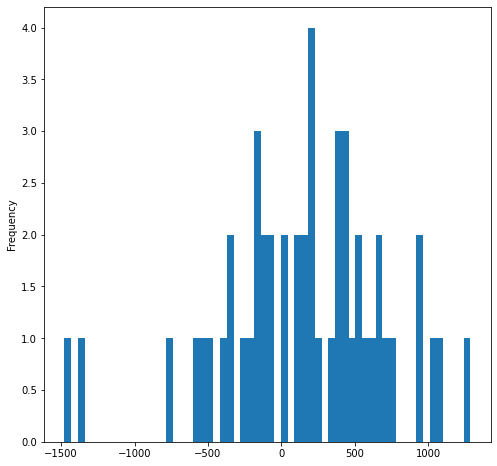

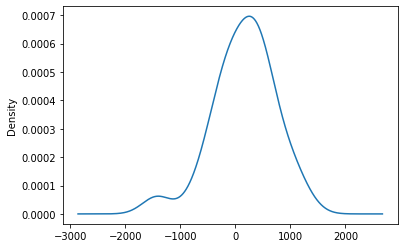

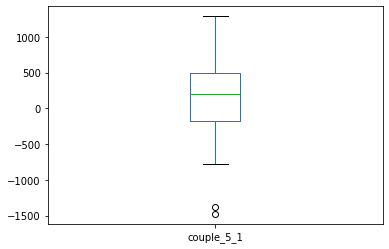

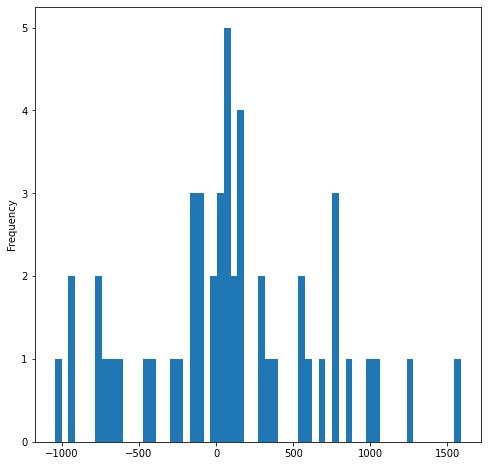

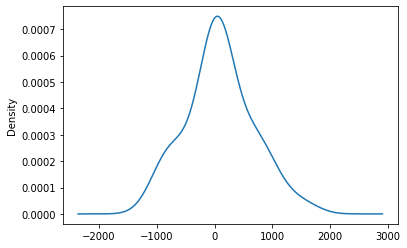

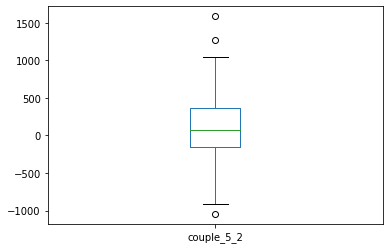

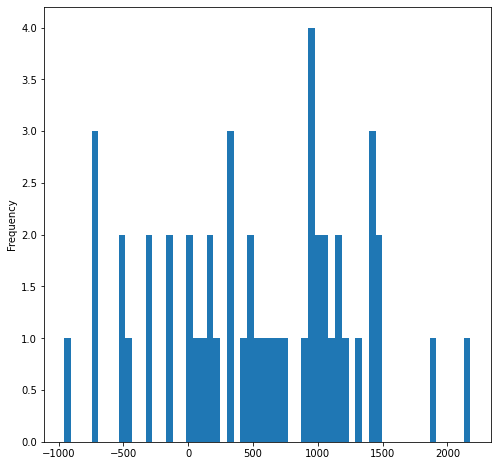

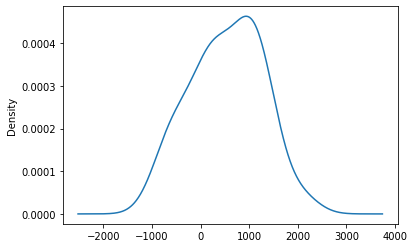

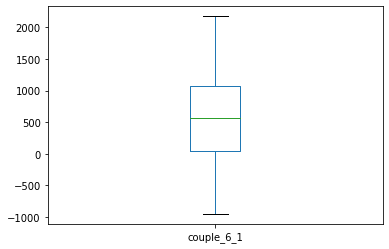

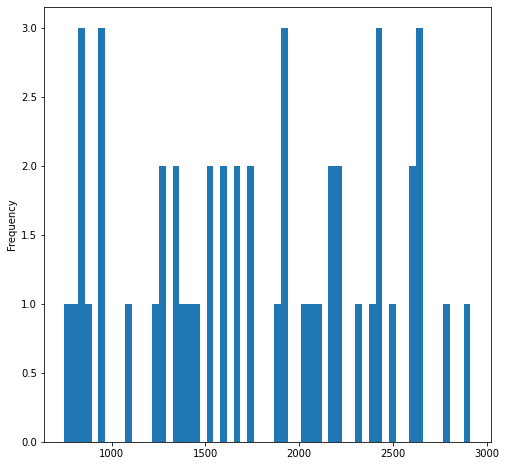

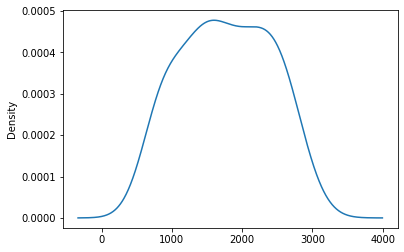

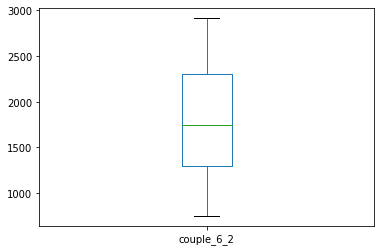

In [5]:
for data_series in data.columns:
    visualise_quant_variable(data[data_series], 8)

In [6]:
normal_dist = {}
for i in range(1, 7):
    shapiro_return_1 = shapiro(data[f'couple_{i}_1']).pvalue
    print(f'couple_{i}_1 {shapiro_return_1} {(shapiro_return_1 > alpha)}')
    shapiro_return_2 = shapiro(data[f'couple_{i}_2']).pvalue
    print(f'couple_{i}_2 {shapiro_return_2} {(shapiro_return_2 > alpha)}')

    
    normal_dist[i] = shapiro_return_1 > alpha and shapiro_return_2 > alpha

couple_1_1 0.9784907102584839 True
couple_1_2 0.03437116742134094 False
couple_2_1 0.5925362706184387 True
couple_2_2 0.8992013335227966 True
couple_3_1 0.2931293547153473 True
couple_3_2 0.130805104970932 True
couple_4_1 0.08024031668901443 True
couple_4_2 0.9789198637008667 True
couple_5_1 0.21994918584823608 True
couple_5_2 0.3952553868293762 True
couple_6_1 0.5049821734428406 True
couple_6_2 0.04268956184387207 False


In [7]:
def levene_pair (data, pair_number, alpha):
    _, levene_return = levene(data[f'couple_{pair_number}_1'], data[f'couple_{pair_number}_2'])
    print(f'couple_{pair_number} {levene_return} {(levene_return > alpha)}')
    return levene_return > alpha

In [8]:
equal_var = {}
for i in range(1, 7):
    equal_var[i] = levene_pair(data, i, alpha)

couple_1 0.33027324674141134 True
couple_2 0.28327681739428434 True
couple_3 3.433796220832555e-11 False
couple_4 6.359843691686742e-10 False
couple_5 0.9878744938603882 True
couple_6 0.29832479910884196 True


In [9]:
for i in range(1, 7):
     if (normal_dist[i]):
          _, test_return = ttest_ind(data[f'couple_{i}_1'], data[f'couple_{i}_2'], equal_var=equal_var[i])
     else:
          _, test_return = mannwhitneyu(data[f'couple_{i}_1'], data[f'couple_{i}_2'])
     print(f'couple_{i} {test_return} {(test_return> alpha)}')

couple_1 0.061686539756991295 True
couple_2 0.012410999828495297 False
couple_3 0.0027144638358722736 False
couple_4 0.6845775687260063 True
couple_5 0.580311718588153 True
couple_6 8.7843693861643e-12 False


In [10]:
_, levene_return = levene(data[f'couple_1_1'], data[f'couple_1_2'], data[f'couple_2_1'], data[f'couple_2_2'], data[f'couple_3_1'], data[f'couple_3_2'], data[f'couple_4_1'], data[f'couple_4_2'], data[f'couple_5_1'], data[f'couple_5_2'], data[f'couple_6_1'], data[f'couple_6_2'])
print(levene_return, levene_return > alpha)

7.348589706488424e-41 False
